## Introduction

[Monkeypox](https://drive.google.com/file/d/11Ymr7ORHt2MRP5Zy6e7ErjTDGaNhZ-j9/view?usp=sharing) is an infectious disease caused by the monkeypox virus that can occur in certain animals, including humans. Symptoms begin with fever, headache, muscle pains, swollen lymph nodes, and feeling tired.


An ongoing outbreak of monkeypox was confirmed on 6 May 2022, beginning with a British resident who, after traveling to Nigeria (where the disease is endemic), presented symptoms consistent with monkeypox on 29 April 2022. The resident returned to the United Kingdom on 4 May, creating the country's index case of the outbreak.


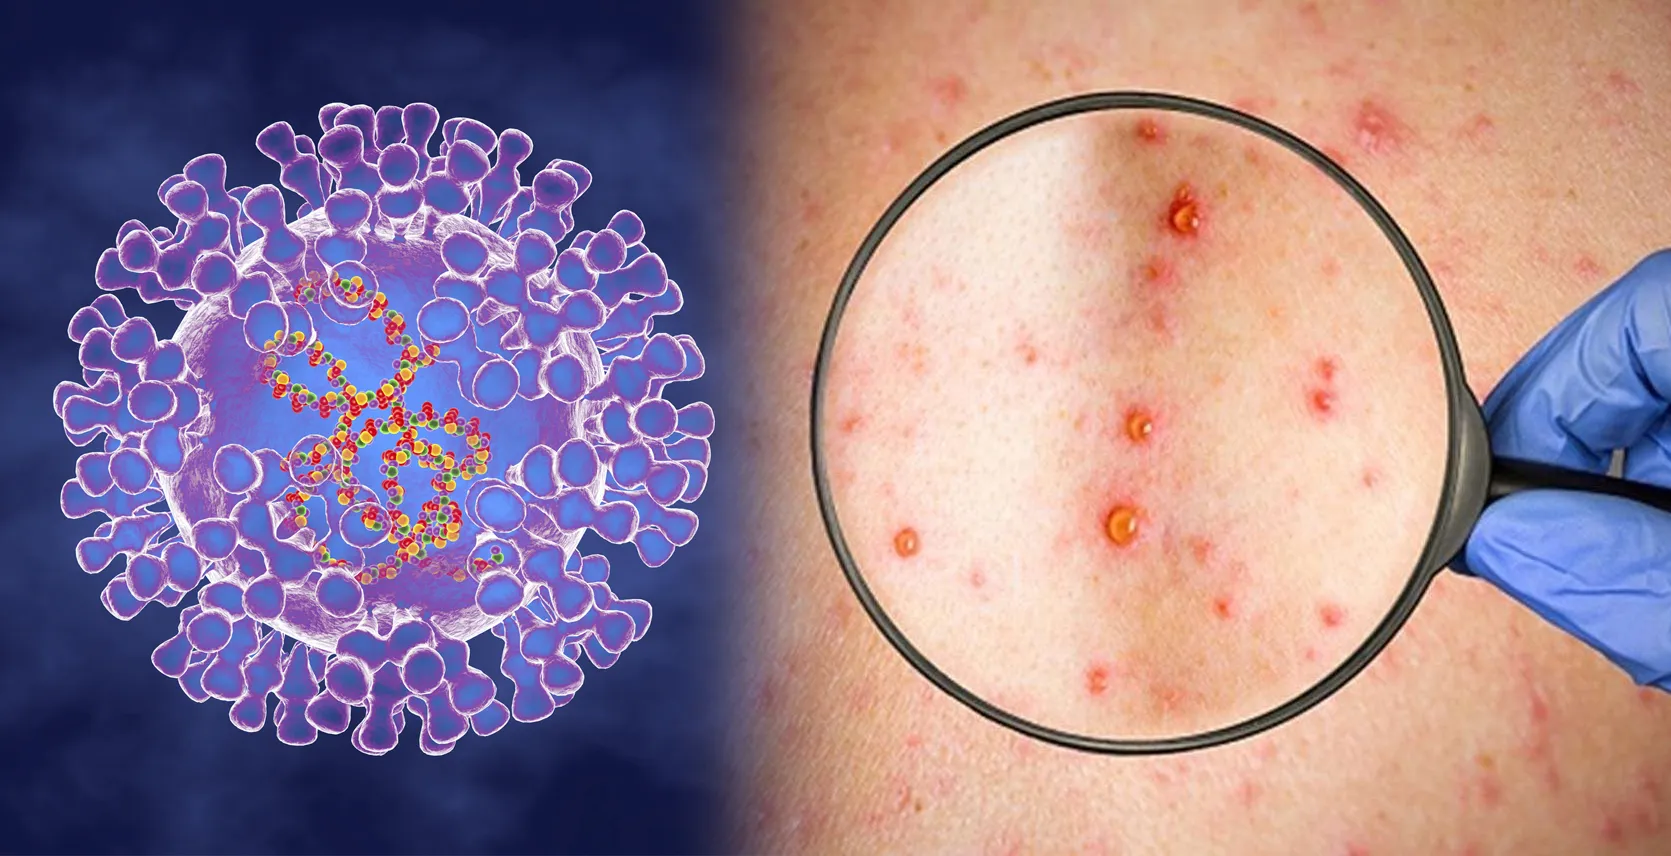

## Loading and Importing Data


In this step, we will first import libraries and then load this monkey_box datasets into the notebook.

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
sns.set_style('darkgrid')
# ignore warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Daily_Country_Wise_Confirmed_Cases.csv to Daily_Country_Wise_Confirmed_Cases (2).csv
Saving Monkey_Pox_Cases_Worldwide.csv to Monkey_Pox_Cases_Worldwide (2).csv
Saving Worldwide_Case_Detection_Timeline.csv to Worldwide_Case_Detection_Timeline (2).csv
Saving List of countries - Table 9.xls to List of countries - Table 9 (1).xls


In [3]:
df_1 = pd.read_csv("Daily_Country_Wise_Confirmed_Cases.csv") 
df_2 = pd.read_csv("Monkey_Pox_Cases_Worldwide.csv")
df_3 = pd.read_csv("Worldwide_Case_Detection_Timeline.csv")

## General Exploration

In [4]:
# getting peek at the data
df_1.head()

,Country,2022-05-06,2022-05-12,2022-05-13,2022-05-15,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,...,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04
0,England,1,1,1,4,0,2,0,11,0,...,24,0,0,0,71,11,5,11,15,0
1,Portugal,0,0,0,0,3,11,9,0,0,...,9,16,0,0,22,4,19,19,5,0
2,Spain,0,0,0,0,0,7,0,23,10,...,25,21,0,9,8,20,0,26,27,0
3,United States,0,0,0,0,0,1,0,1,0,...,5,3,0,2,0,5,0,4,3,0
4,Canada,0,0,0,0,0,0,2,3,0,...,11,0,0,0,0,1,27,23,3,0


In [5]:
# look at the second df
df_2.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,214.0,0.0,5.0,2.0,7.0
1,Portugal,143.0,0.0,0.0,0.0,34.0
2,Spain,189.0,35.0,10.0,2.0,0.0
3,United States,27.0,1.0,3.0,13.0,0.0
4,Canada,80.0,7.0,1.0,1.0,0.0


In [6]:
# look at the second df
df_3.head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-05-06,England,London,NaN,NaN,rash,Y,Y,Y
1,2022-05-12,England,London,NaN,NaN,rash,Y,Y,N
2,2022-05-13,England,London,NaN,NaN,vesicular rash,N,Y,N
3,2022-05-15,England,London,NaN,male,vesicular rash,Y,Y,N
4,2022-05-15,England,London,NaN,male,vesicular rash,Y,Y,N


Insights:

* df_1 shows daily counts of monkeypox cases for each concerned country
* df_2 is the summary of daily cases like how many cases are having travel history related.
* df_3 shows minute details of each case 

In [7]:
# describe about it
df_1.describe()

,2022-05-06,2022-05-12,2022-05-13,2022-05-15,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-23,...,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04
count,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.00000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.031250,0.031250,0.031250,0.125000,0.09375,0.656250,0.500000,1.43750,0.500000,2.281250,...,2.750000,1.593750,0.500000,0.468750,3.843750,2.062500,2.593750,3.906250,2.843750,0.031250
std,0.176777,0.176777,0.176777,0.707107,0.53033,2.280483,1.626395,4.42819,1.796053,6.849697,...,6.278483,4.641047,1.665591,1.684548,13.107765,4.825587,6.241688,7.441641,6.096585,0.176777
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000,0.000000,1.000000,...,2.000000,0.250000,0.000000,0.000000,1.000000,1.000000,1.250000,2.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,3.00000,11.000000,9.000000,23.00000,10.000000,36.000000,...,25.000000,21.000000,9.000000,9.000000,71.000000,20.000000,27.000000,26.000000,27.000000,1.000000


If it seems like dataset does not work like here. So, we will first transpose this dataset and remove the unnecessary things to get a cleaned data



In [8]:
# transpose data
df_T = df_1.T
df_T.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Country,England,Portugal,Spain,United States,Canada,Belgium,France,Italy,Sweden,Germany,...,Ireland,Argentina,Finland,Malta,Mexico,Norway,Hungary,United Kingdom,Morocco,Latvia
2022-05-06,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-15,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# rename columns by using 1 row of the df
df_T.columns = df_T.iloc[0,:]

# look at the new df
df_T.columns  = df_T.iloc[0]
# removing 1st row
df_T = df_T.iloc[1:]
# naming the column center as 
df_T.columns.name ='Time'

 Describe about each dataset

 Now,we will look into each column of different dataframe to get some important facts(using describe method of pandas)

In [10]:
# info first
df_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2022-05-06 to 2022-06-04
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   England               22 non-null     object
 1   Portugal              22 non-null     object
 2   Spain                 22 non-null     object
 3   United States         22 non-null     object
 4   Canada                22 non-null     object
 5   Belgium               22 non-null     object
 6   France                22 non-null     object
 7   Italy                 22 non-null     object
 8   Sweden                22 non-null     object
 9   Germany               22 non-null     object
 10  Australia             22 non-null     object
 11  Netherlands           22 non-null     object
 12  Switzerland           22 non-null     object
 13  Israel                22 non-null     object
 14  Denmark               22 non-null     object
 15  Scotland              22 non-n

In [11]:
# convert into object 
df_T =df_T[df_T.columns].apply(pd.to_numeric)

In [12]:
# info of summary df
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             49 non-null     object 
 1   Confirmed_Cases     50 non-null     float64
 2   Suspected_Cases     50 non-null     float64
 3   Hospitalized        50 non-null     float64
 4   Travel_History_Yes  50 non-null     float64
 5   Travel_History_No   50 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [13]:
# info of daily counts
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_confirmation        920 non-null    object
 1   Country                  920 non-null    object
 2   City                     295 non-null    object
 3   Age                      151 non-null    object
 4   Gender                   290 non-null    object
 5   Symptoms                 94 non-null     object
 6   Hospitalised (Y/N/NA)    115 non-null    object
 7   Isolated (Y/N/NA)        116 non-null    object
 8   Travel_history (Y/N/NA)  107 non-null    object
dtypes: object(9)
memory usage: 64.8+ KB


Insights:

* There is quite less knowledge of symptoms for this disease( which usually occurs for a new disease).

In [14]:
# describe of each 
df_T.describe()

Time,England,Portugal,Spain,United States,Canada,Belgium,France,Italy,Sweden,Germany,...,Ireland,Argentina,Finland,Malta,Mexico,Norway,Hungary,United Kingdom,Morocco,Latvia
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,9.727273,6.500000,8.590909,1.181818,3.636364,0.772727,2.318182,1.000000,0.227273,3.000000,...,0.272727,0.090909,0.090909,0.045455,0.045455,0.090909,0.045455,0.045455,0.045455,0.045455
std,16.492947,7.449832,10.121449,1.735796,7.594142,1.377777,5.149076,1.573592,0.428932,4.918381,...,0.631085,0.426401,0.294245,0.213201,0.213201,0.294245,0.213201,0.213201,0.213201,0.213201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.500000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,10.750000,17.500000,2.000000,2.750000,1.000000,1.750000,1.000000,0.000000,2.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,71.000000,22.000000,27.000000,5.000000,27.000000,5.000000,18.000000,6.000000,1.000000,17.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_2.describe()

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
count,50.000000,50.000000,50.00000,50.000000,50.000000
mean,18.400000,1.340000,1.32000,1.680000,0.900000
std,45.594933,5.049187,3.40132,2.736302,4.883333
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.500000,0.000000,0.00000,1.000000,0.000000
75%,7.500000,1.000000,1.00000,2.000000,0.000000
max,214.000000,35.000000,18.00000,13.000000,34.000000


In [16]:
df_3.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,920,920,295,151,290,94,115,116,107
unique,22,32,62,17,4,21,2,1,2
top,2022-06-02,England,Madrid,20-64,male,genital ulcer lesions,N,Y,Y
freq,125,214,112,60,284,30,61,116,64


Insights:

*  This virus is affecting mostly male , dominating in europe with most prevalent in england.
* It affects most individuals in the working age population (may be due to travel history) affecting the sexual organs (could be sexually transmitted)

## Pattern of Cases for Each Country

In [17]:
# total cases shows
day_cases = df_T.sum(axis=1) # through rowwise

# new column for daily_world_cases
df_T['World'] = day_cases

Now, we will plot of the cases for each part of the world , based on the input given by the user.

For example, if the user wants to show the trend of cases of england , we will show this.

For which part of the world you want to see the trend of cases (country)World


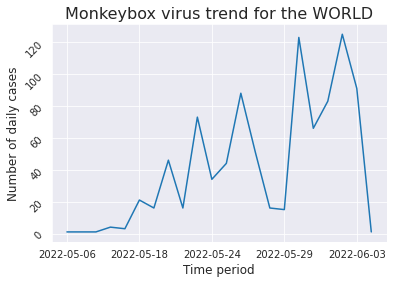

In [18]:
# taking an input (making sure it is upper case)
country = input("For which part of the world you want to see the trend of cases (country)").upper()

# first making all upper 
df_T.columns  = [x.upper() for x in df_T.columns]
if country in df_T.columns:
  df_T[country].plot()
  plt.title("Monkeybox virus trend for the {}".format(country),fontsize=16)
  plt.xlabel("Time period",fontsize=12)
  plt.yticks(rotation=45)
  plt.ylabel("Number of daily cases",fontsize=12)
  plt.show()
else:
  print("Sorry , we do not the information for this country,please check the countries list (by using df_T.columns")  

If we observe the graph for the world, we will find that it started slowly but now attaining new peaks.







## Geographical Representation

Now , we will make a map showing the number of cases for each country.
For this purpose, we will make use of [geopandas](https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/)

In [19]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
# importig geopandas
import geopandas as gps
# using natural earth lowres dataset to get the details  of eart (like longitude and latitude of different parts of earth)
df_world = gps.read_file(gps.datasets.get_path('naturalearth_lowres'))
# look at the head of df_world
df_world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [21]:
if 'Canada' in df_world['name']:
  print("worr")
else:
  print("no")  

no


In [22]:
df_world[df_world['name'] ==  'United Kingdom']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
143,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."


In [23]:
# let us do some changes to fit the dataset
cleaned_country  = []
for x in df_2['Country']:
  if x =='England' or x == 'UK':
    cleaned_country.append('United Kingdom')
  elif x =='United States':
    cleaned_country.append('United States of America')  
  else:
    cleaned_country.append(x)
df_2['Country'] = cleaned_country


In [24]:
# merge both df_2 and df_world
df_country_count  = df_2[['Country','Confirmed_Cases']]
df_world_merged = pd.merge(df_world,df_country_count,how='right',left_on ='name',right_on ='Country')

In [25]:
# look at the new and merged dataset
df_world_merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Confirmed_Cases
0,64769452.0,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",United Kingdom,214.0
1,10839514.0,Europe,Portugal,PRT,297100.0,"POLYGON ((-9.03482 41.88057, -8.67195 42.13469...",Portugal,143.0
2,48958159.0,Europe,Spain,ESP,1690000.0,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",Spain,189.0
3,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,27.0
4,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,80.0


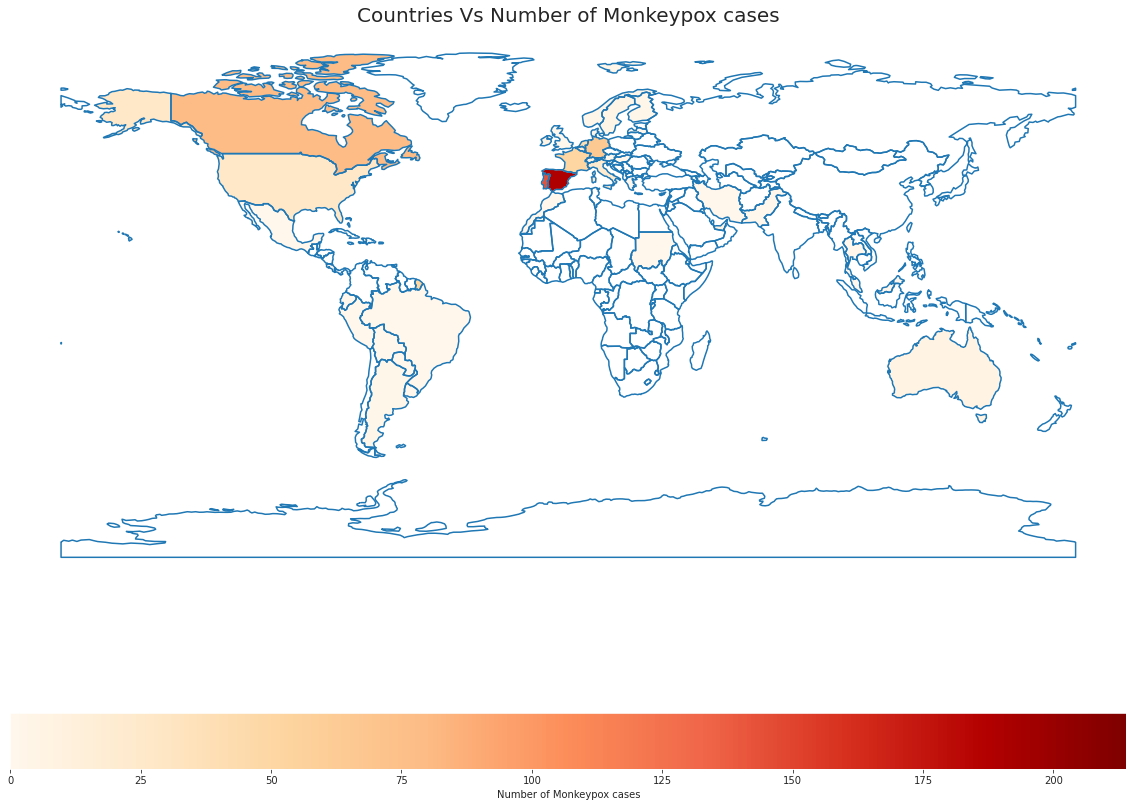

In [26]:
# deciding the axis
ax = df_world["geometry"].boundary.plot(figsize=(20,16))
# now plotting it
df_world_merged.plot(column ='Confirmed_Cases',  ax=ax,cmap ='OrRd',
legend=True, legend_kwds={"label": "Number of Monkeypox cases", "orientation":"horizontal"})
ax.set_title("Countries Vs Number of Monkeypox cases",fontsize=20)
plt.axis('off')
plt.show()


## Cases Continent Wise

In [27]:
# show cases world wide
df_world_merged[['continent','Confirmed_Cases']]

,continent,Confirmed_Cases
0,Europe,214.0
1,Europe,143.0
2,Europe,189.0
3,North America,27.0
4,North America,80.0
5,Europe,5.0
6,Europe,22.0
7,Europe,51.0
8,Europe,17.0
9,Oceania,6.0


(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

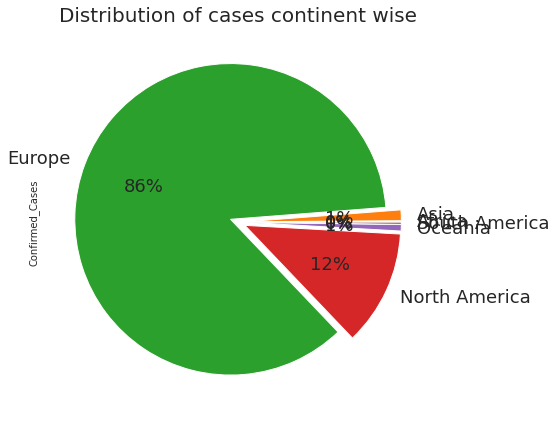

In [28]:
# group by to case sum cases
df_world_merged.groupby('continent')['Confirmed_Cases'].sum().plot(kind='pie',figsize=(11,6),fontsize=18,autopct ='%1.0f%%',explode = (0.05, 0.05, 0.05,0.05,0.05,0.05))
plt.title('Distribution of cases continent wise',fontsize=20)
plt.tight_layout()
plt.xticks(fontsize=11)

About 98 percent of the cases were from the continents : europe and north america.

Text(0, 0.5, 'Number of Cases')

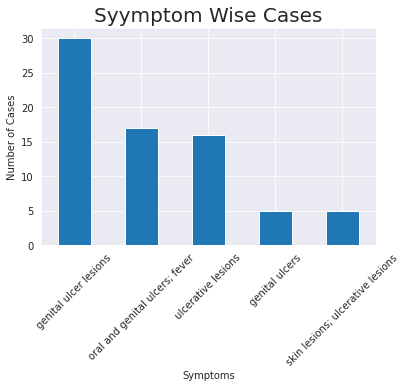

In [29]:
# shows symptons
df_3.groupby('Symptoms')['Symptoms'].count().sort_values(ascending=False)[:5].plot(kind='bar')
plt.title('Syymptom Wise Cases',fontsize=20)
plt.xticks(rotation='45')
plt.ylabel("Number of Cases")

In most of cases (where sympton was detected), it was found that this virus affects the genitals and stomach (as ulcer is related to stomach) of the patient.

In [30]:
pd.unique(df_3['Gender'])
# so we will make some cleaning like replacing to get the right form of data in Gender variable of the dataframe.

array([nan, 'male', 'female', 'Male', 'male '], dtype=object)

Text(0, 0.5, 'Number of Cases')

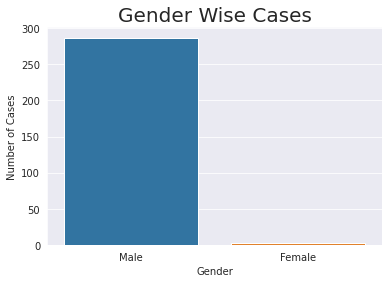

In [31]:
# replace the male thing with Male , female with Female
df_3.replace({'male':'Male','female':'Female','male ':'Male'},inplace=True)
sns.countplot(df_3.Gender)
plt.title('Gender Wise Cases',fontsize=20)
plt.ylabel("Number of Cases")

This virus dominates in case of male gender.

Text(0, 0.5, 'Number of Cases')

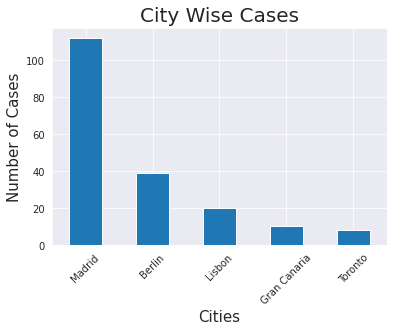

In [32]:
# top 5 cities getting affected by this virus
df_3.groupby('City')['City'].count().sort_values(ascending=False)[:5].plot(kind='bar')
plt.xticks(rotation ='45')
plt.title('City Wise Cases',fontsize=20)
plt.xlabel('Cities',fontsize=15)
plt.ylabel("Number of Cases",fontsize=15)

On comparing city wise, it has affected mostly spain cities like Madrid and Berlin.

## Travel History

It's time to see how  travel history changes with respect to gender and country.

Text(0, 0.5, 'Number of Cases')

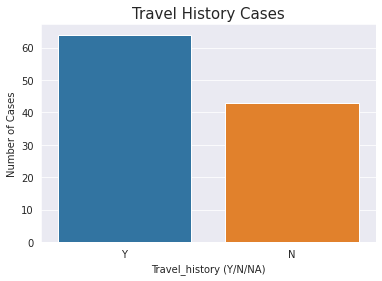

In [33]:
# history traval history
sns.countplot(df_3['Travel_history (Y/N/NA)'])
plt.title('Travel History Cases',fontsize=15)
plt.ylabel("Number of Cases")

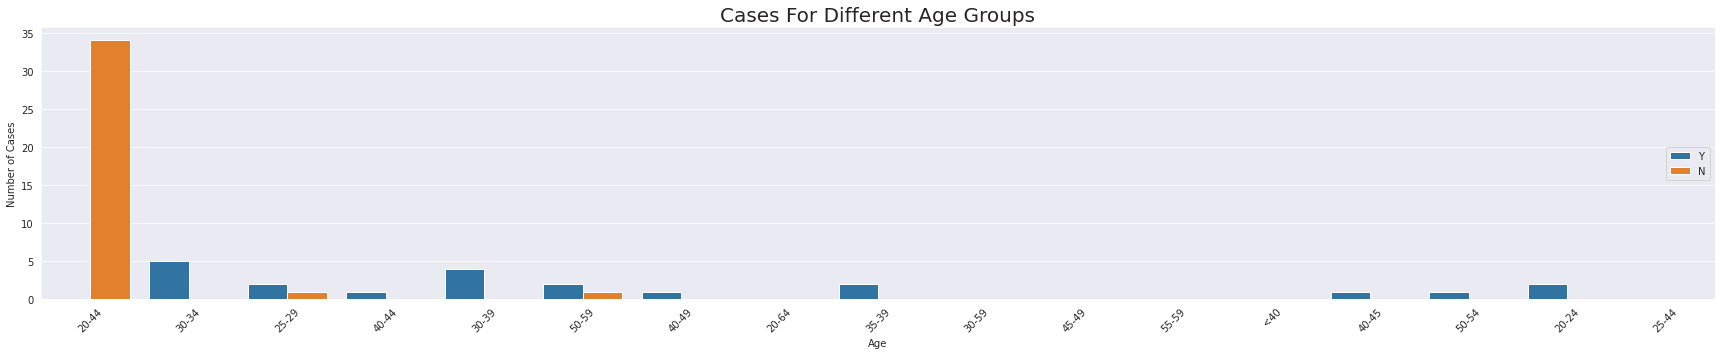

In [34]:
# Age wise travel history
plt.figure(figsize=(30,5))
sns.countplot('Age',data=df_3,hue='Travel_history (Y/N/NA)')
plt.title('Cases For Different Age Groups',fontsize=20)
plt.xticks(rotation = 45)
plt.legend(loc='right')
plt.ylabel("Number of Cases")
plt.show()

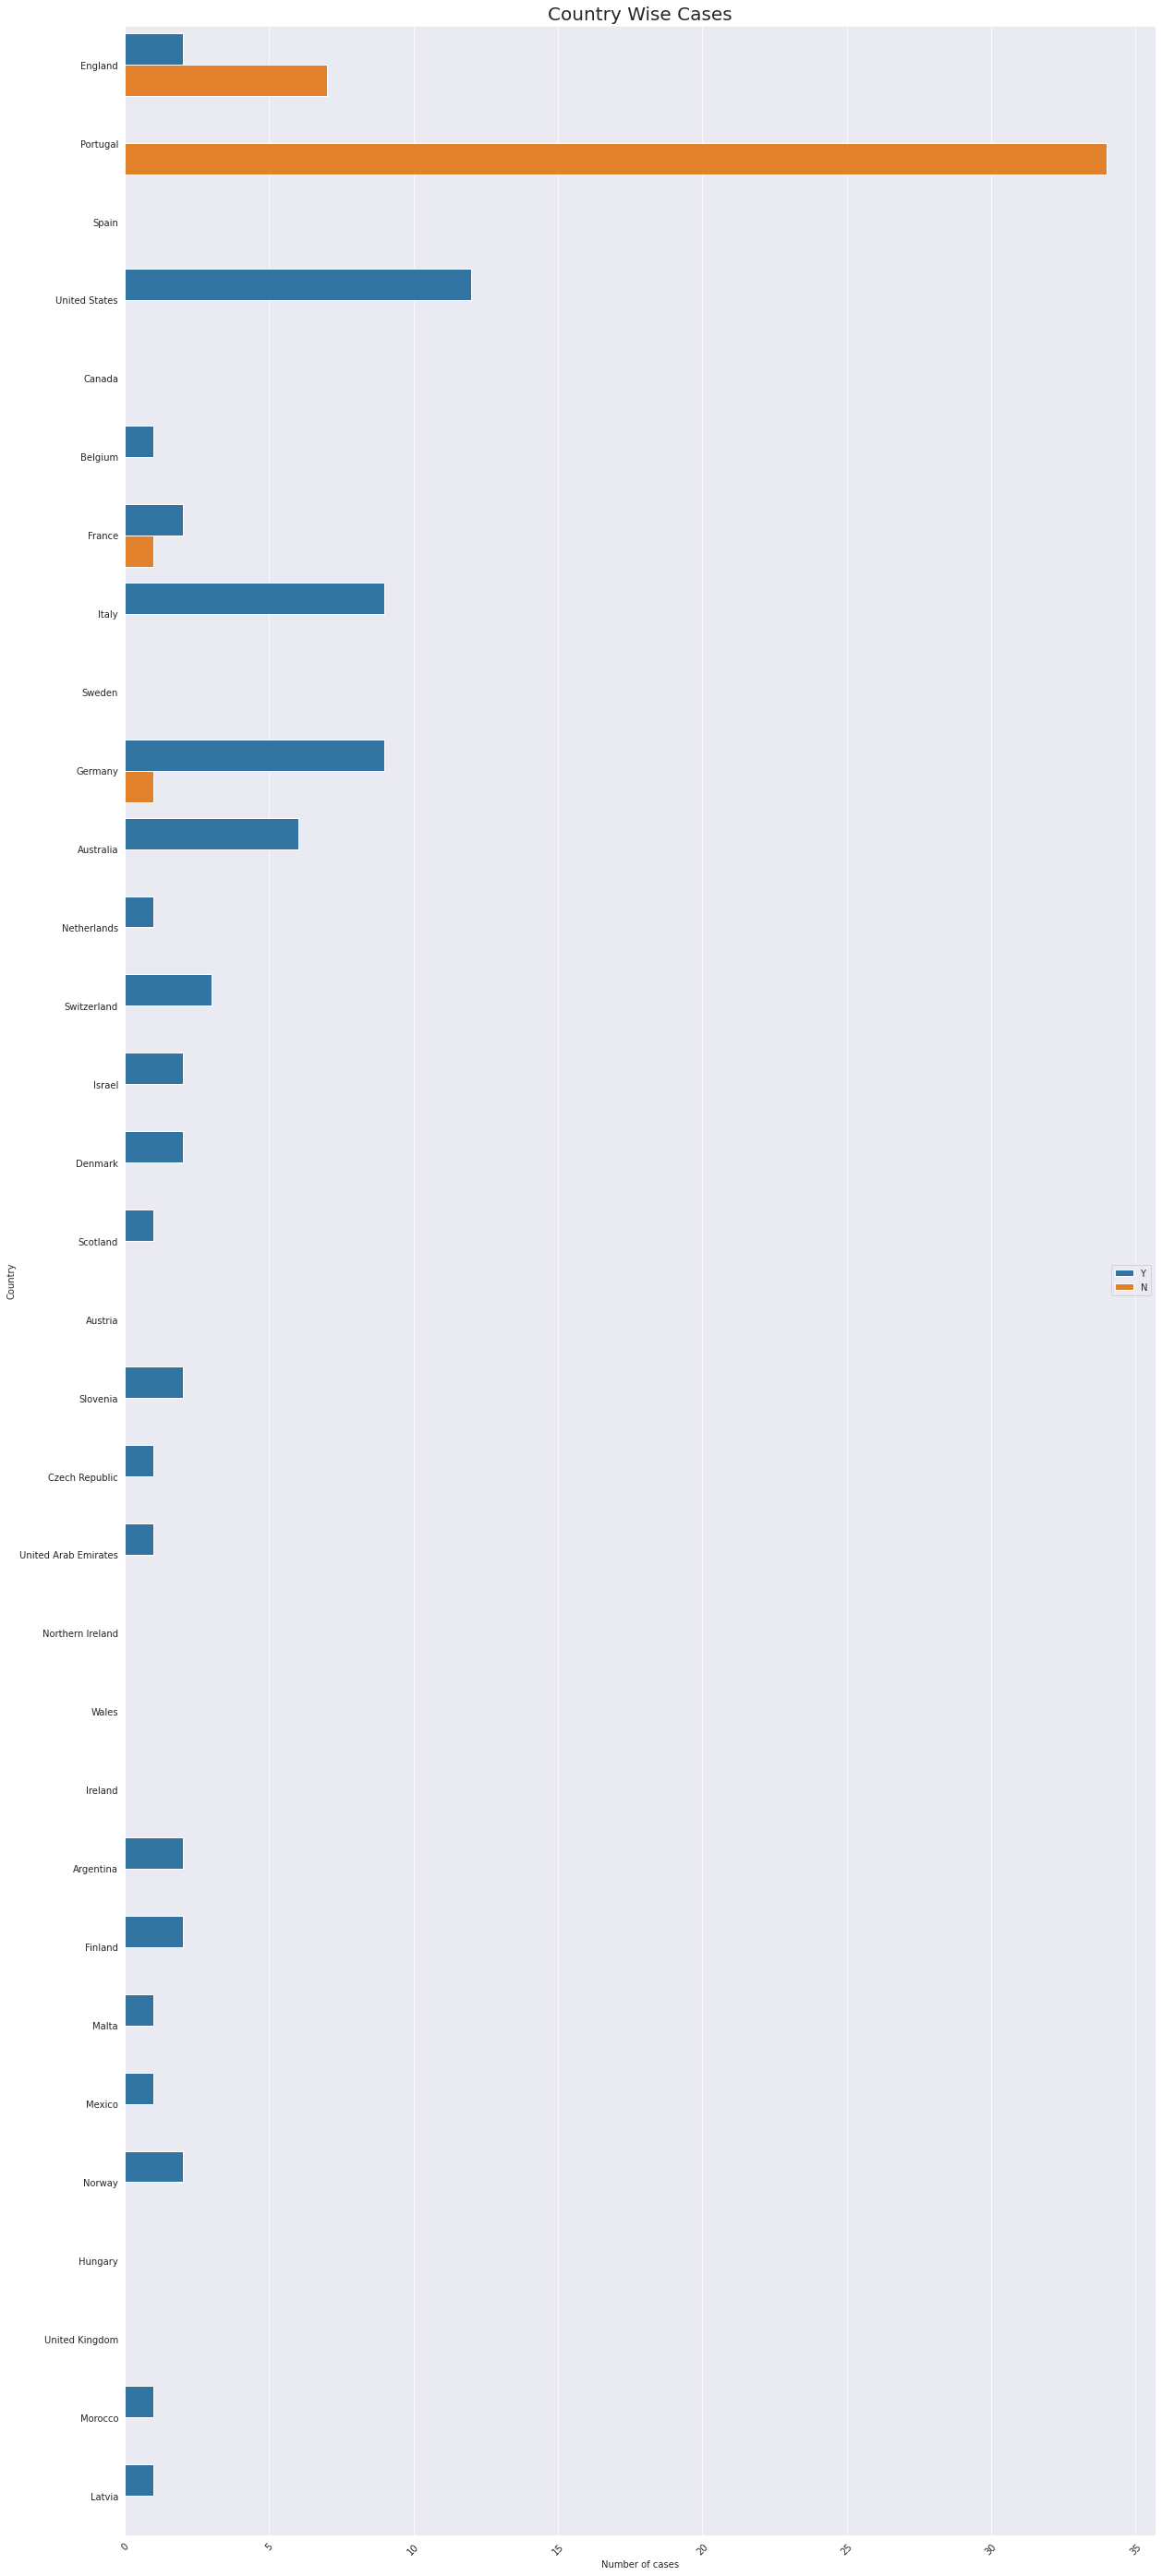

In [35]:
# country wise
plt.figure(figsize=(20,50))
sns.countplot(y = 'Country',data=df_3,hue='Travel_history (Y/N/NA)')
plt.title('Country Wise Cases',fontsize=20)
plt.xticks(rotation = 45)
plt.legend(loc='right')
plt.xlabel("Number of cases")
plt.show()

Insights:
* More than 60 percent of patients (where there was travel history details) had a travel history.

* In case of portugal, all of cases were non-travel. Apart from England and Portugal, countries experiencing this virus due to travel. It might like this virus originated in the above Europe countries and then spread out to others via travel of people across borders.

* This disease or virus affecting the people belonging to 20-44 age group.Since this virus seems to be sexually transmitted, it is highly likely that there are more young people (in percentage terms) getting affected by this virus.




##Hospitality


We will now see how hospitalization of patients varies across gender and symptoms.

Text(0, 0.5, 'Number of Cases')

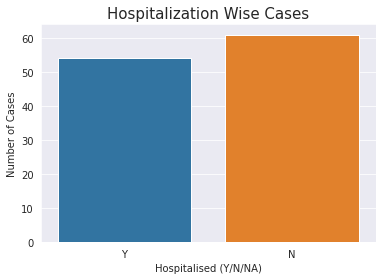

In [36]:
# number of hospitalized
sns.countplot(df_3['Hospitalised (Y/N/NA)'])
plt.title('Hospitalization Wise Cases',fontsize=15)
plt.ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

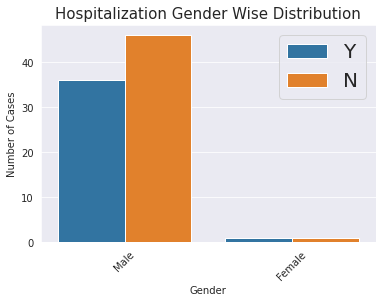

In [37]:
# gender wise hospitalization
sns.countplot('Gender',data =df_3, hue='Hospitalised (Y/N/NA)')
plt.title('Hospitalization Gender Wise Distribution',fontsize=15)
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.ylabel("Number of Cases")

Text(0, 0.5, 'Number of Cases')

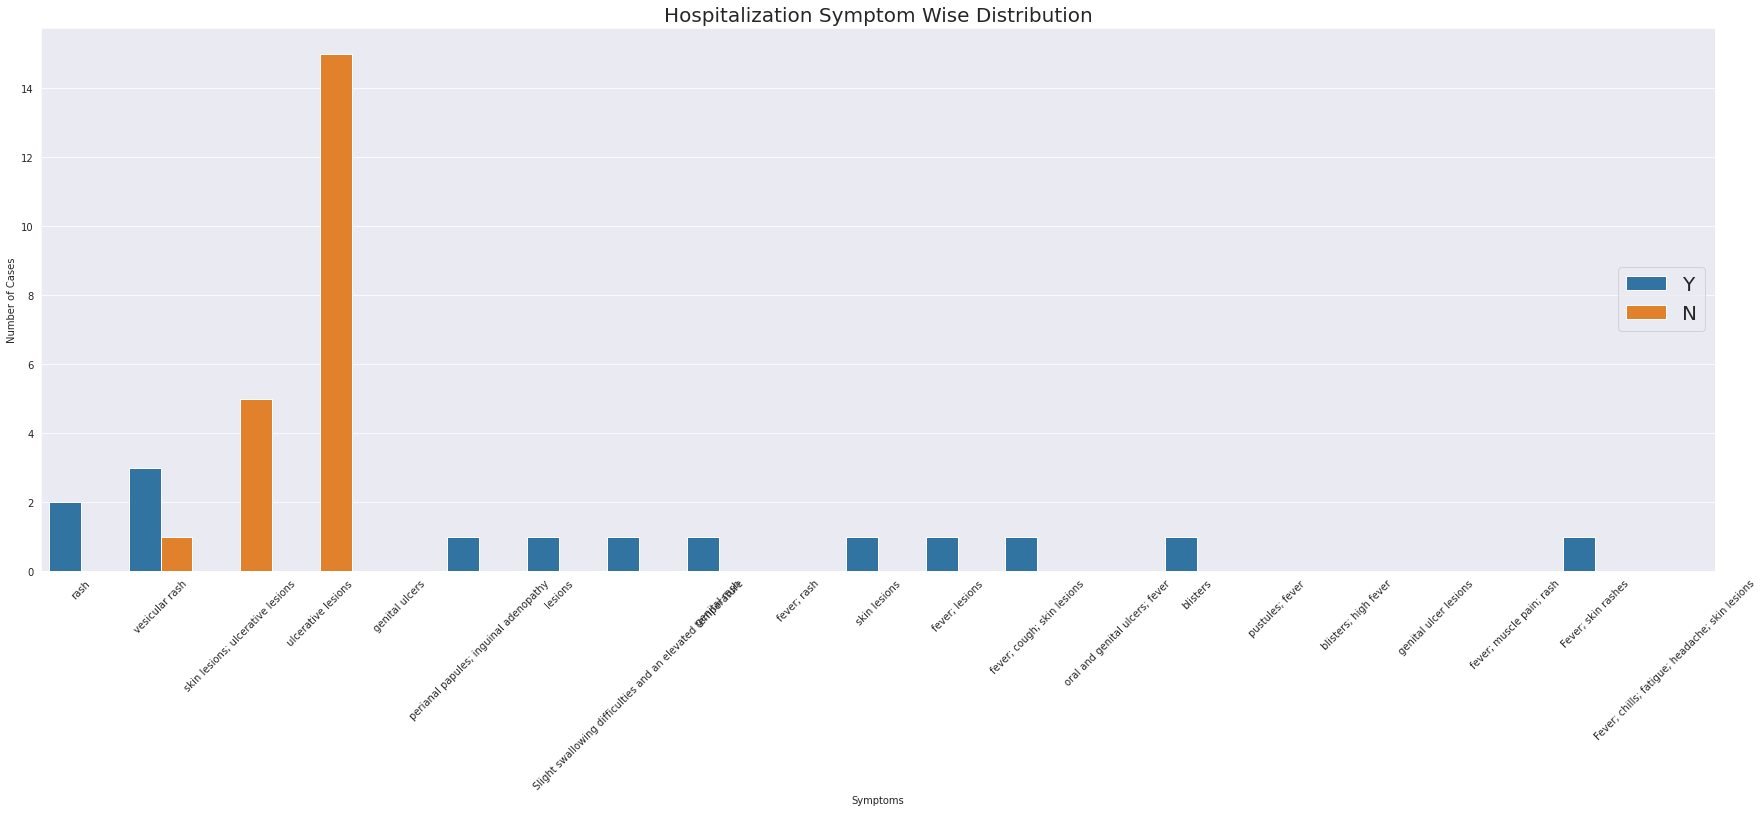

In [38]:
# symptons wise
plt.figure(figsize=(30,10))
sns.countplot('Symptoms',data =df_3, hue='Hospitalised (Y/N/NA)')
plt.title('Hospitalization Symptom Wise Distribution',fontsize=20)
plt.xticks(rotation = 45)
plt.legend(loc='right',fontsize=20)
plt.ylabel("Number of Cases")

Insights:

* In about 60 percent of provided data, patients did not need any hospitalization.

* In female (although very low small), odds are same for getting hospitalization and not getting it.

* In most of the symptoms , people are getting hospitalized. Except for skin lession and ulcerative lesions alone, there was not any need for it. 

## Travel History Vs Hospitalization


Now, we will look into the relatioinship between travel history and hospitalization.

In [39]:
# cross tab chi square
pd.crosstab(df_3['Travel_history (Y/N/NA)'],df_3['Hospitalised (Y/N/NA)'])

Hospitalised (Y/N/NA),N,Y
Travel_history (Y/N/NA),,
N,36,3
Y,13,20


If we look at the above cross table, we will find that it is quite likely that one who has a travel history has a higher chance of getting hospitalize (Y for both) or viceversa (that is one who has not a travel history will have more chances of getting hospitalized).



To check this, we will conduct a [chi-square test](https://www.geeksforgeeks.org/python-pearsons-chi-square-test/) which will check the indepedence of two categorical variable (here both travel history and hospitalized are both cat variables)

Ho: There is independence between travel history and hospitalization.


Ha: There is dependence between travel history and hospitalization.

In [40]:
# using chi2_contigency method of stats
from scipy.stats import chi2_contingency
stats,p,dof,expect = chi2_contingency([[36,3],[13,20]])

if p < 0.05:
  print("Reject the null hypothesis of independence, that is there is dependence between traval history and hospitalization of patients")
else:
  print("Null hypothesis hold true, both travel history and hospitalization have no association thus, are independent")


Reject the null hypothesis of independence, that is there is dependence between traval history and hospitalization of patients


## World Cloud
Now, we will create a cloud of countries where this virus is most prevalent. It will be done using word cloud technique

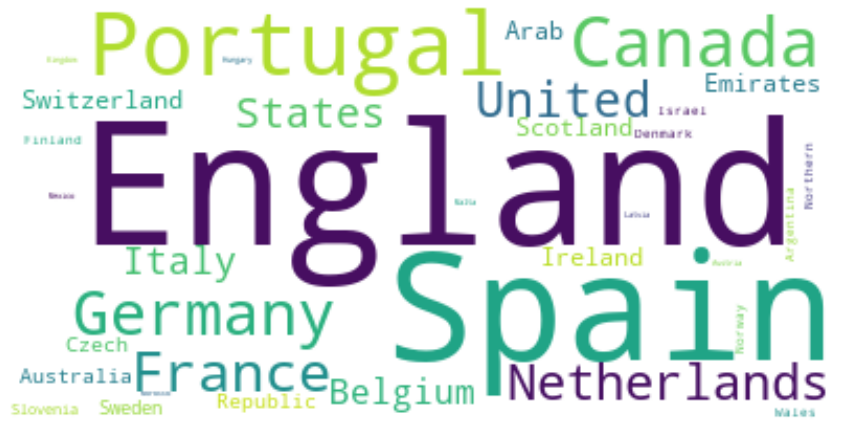

In [41]:
# importing wordcloud
from wordcloud import WordCloud
# forming a text
text = " ".join(nat for nat in df_3['Country'])
plt.figure(figsize= (15,30))
cloud_gen = WordCloud(background_color='White',collocations=False).generate(text)
plt.imshow(cloud_gen, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

This new virus is mostly spread only in two continents : Europe and America. Countrywise, it dominates mainly in countries like england  portugal , and spain.

## Conclusion


Based on the above analysis, we have arrived at the following insigtts:

Monkeybox is a new virus orgininating in europe countries like **UK and spain**. From that, it has spead out to other europe countries and other parts of the world. It affects mostly **young** populution seems to occuring due to **sexually transmission (skin to skin touch)** with symptoms related to **genitals** and **ulcers**. Apart from this, it seems to be affecting **male** population more. At last, we found a link or **dependency** between **travel history** and **hospitalization**. In other words, those who have travelled abroad seem to getting a severe disease and thus, needing hospitalization requirement.

## References:

Monkeypox dataset kaggle: https://www.kaggle.com/deepcontractor/monkeypox-dataset-daily-updated


WHO Website:https://www.who.int/emergencies/disease-outbreak-news/item/2022-DON385


Wikepedia: https://en.wikipedia.org/wiki/Monkeypox